In [ ]:
from GA_lib.operators.mutation import Mutation1, Mutation2
from GA_lib.operators.crossover import OnePointCrossover, TwoPointCrossover
from GA_lib.operators.selection import ElitismSelection
from GA_lib.tasks.timetabling import TimeTabling
from GA_lib.object.EA import Population
from GA_lib.models.GA_Model import GA_model
import numpy as np

In [ ]:
import glob
fn = glob.glob("data/*.txt")
file_list = [f.split("\\")[1].split(".")[0] for f in fn]
file_list

['input_100_60_495',
 'input_10_2_4',
 'input_200_100_1990',
 'input_20_4_19',
 'input_500_300_12475',
 'input_50_10_122',
 'input_6_3_1',
 'input_800_600_31960']

In [ ]:
import time
data_list = ['input_800_600_31960']
for data in data_list:
  for i in range(5):
    n_course = int(data.split("_")[1])
    if(n_course < 50):
      nb_inds = 50
      nb_generation = 200
    elif(n_course <= 200):
      nb_inds = 200
      nb_generation = 500
    else:
      nb_inds = 100
      nb_generation = 700

    timetabling_task = TimeTabling(f"./data/{data}.txt")
    model = GA_model()
    time_begin = time.time()
    model.compile(task=timetabling_task, crossover = TwoPointCrossover, mutation= Mutation2, selection = ElitismSelection)
    solution = model.fit(nb_generations=nb_generation, nb_inds=nb_inds, p_c = 0.8, p_m = 0.6)
    time_end = time.time()
    model.render_history(title = data, save_fig=True)
    # print(f'Done {data}!')
    # with open("best_solution.txt", "a") as f:
    #     f.write(f"dataset: {data} \n")
    #     f.write(f"runtime: {time_end-time_begin} \n")
    #     f.write(f"best fitness: {-max(solution.fitness)} \n")
    #     f.write(f"best solution: {solution.population[0].genes} \n \n")

Time: 41m 27.56s   33 % [======>             ]  Cost: -679  ,  

KeyboardInterrupt: 

In [ ]:
dataset = "input_10_2_4"
timetabling_task = TimeTabling(f"./data/{dataset}.txt")
sum(timetabling_task.num_candidate) / sum(timetabling_task.num_seat)

4.606060606060606

In [ ]:
timetabling_task()

In [ ]:
dataset = "input_100_60_495"
timetabling_task = TimeTabling(f"./data/{dataset}.txt")
model = GA_model()
model.compile(task=timetabling_task, crossover = TwoPointCrossover, mutation= Mutation2, selection = ElitismSelection)
a = model.fit(nb_generations=1000, nb_inds=300, p_c = 0.8, p_m = 0.6)

Time: 03m 32.57s   35 % [=======>            ]  Cost: -58  ,  

KeyboardInterrupt: 

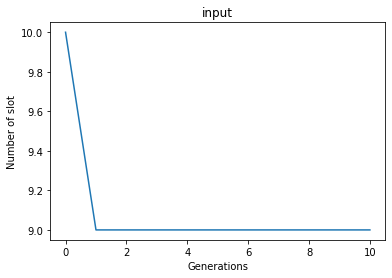

<Figure size 432x288 with 0 Axes>

In [ ]:
model.render_history(save_fig=True)

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 42 kB/s 
     |████████████████████████████████| 199 kB 23.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=adce294fef0d2539cee07d6a770a1934ad558878d6a7967748af4e91cf8eeffe
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
import pyspark
pyspark.__version__

'3.3.0'

In [4]:
from pyspark import SparkContext
sc = SparkContext(appName="tutorial")

In [ ]:
text = 

In [5]:
data_rdd = sc.parallelize([("Brooke", 20), ("Jules", 31), ("Jules", 30),
 ("TD", 35), ("Brooke", 25)])
data_rdd.collect()

[('Brooke', 20), ('Jules', 31), ('Jules', 30), ('TD', 35), ('Brooke', 25)]

In [6]:
filtered = data_rdd.map(lambda x: x[0])
filtered.collect()

['Brooke', 'Jules', 'Jules', 'TD', 'Brooke']

pyspark.rdd.PipelinedRDD

In [9]:
from pyspark import SparkContext
logFile = "file:///home/hadoop/spark-2.1.0-bin-hadoop2.7/README.md"
logData = sc.textFile(logFile).cache()
numAs = logData.filter(lambda s: 'a' in s).count()
numBs = logData.filter(lambda s: 'b' in s).count()
print ("Lines with a: %i, lines with b: %i" % (numAs, numBs))

Py4JJavaError: ignored